In [1]:
import sklearn
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

import linear_classification as lc

# 2. Linear Classification
In the last notebook we studied a linear regression example. Let's move on to linear classification, where the ouput y is not a continuous real number, but instead a discrete value. We use the Iris dataset to understand how classification works. The goal of our task is to predict the class of iris plants. There are two different classes we want to differentiate:
Iris VirginicaIris Versicolor
In our dataset we encode the class c∈{Iris Virginica,Iris Versicolor} of a plant in the following way:
$$y = 0 \text{ if } c = \text{Iris Virginica},$$
$$y = 1 \text{ if } c = \text{Iris Versicolor}.$$

| 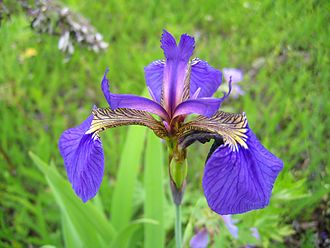 | 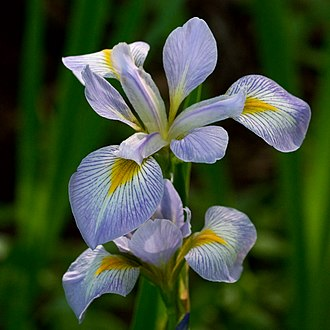 | 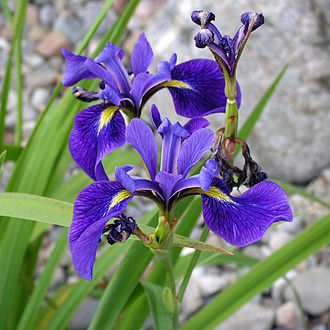 | 
|:--:| :--:| :--:| 
| *Iris setosa (class 0) (source:https://en.wikipedia.org/wiki/Iris_setosa)* | *Iris virginica (class 1) (source:https://en.wikipedia.org/wiki/Iris_virginica)* | *Iris versicolor (class 2) (source:https://en.wikipedia.org/wiki/Iris_versicolor)* |

## 2.1 Load and Print the Dataset
Let's load and plot our dataset first!

In [ ]:
# Load the dataset and have a look!
X, y = lc.load_iris_dataset()

print(X)
print(y)

### Q2.1:
1. How large (number of entries $N$) is the Iris dataset?
2. How many features $k$ does the Iris dataset have? What are their names?
3. What are all possible values for the outcome $y$?

## 2.2 Visualize the Dataset - Feature Selection
We want to visualize the dataset with a two-dimensional **scatter plot**, but the Iris dataset has more than two features. Therefore, we need to **select two features** manually to produce the scatter plot. Plot a few different feature combinations for comparison.

In [ ]:
# Select two features x_1 and x_2 here by creating a list, for example: `features = ["sepal_length", "petal_width"]`
features = []

lc.scatter_iris(X, y, features)

### Q2.2:
1. How many feature combinations (2 out of $k$ features) exist?
2. Which feature combinations do you think work well / badly to separate the two classes? Why?

## 2.3 Decision Boundary
Let's try to separate the classes with a linear function $f(x^{(i)})$ as our **decision boundary**. We can use a simple rule for classification: we look at whether a sample is **above or below** our decision boundary to classify it. Try it out with different feature combinations and note down the parameters of the linear function you chose.

In [ ]:
features = []

def linear_function(x):
    m = 0
    b = 1.7
    return m * x + b

def predict_linear_function(X):
    return (linear_function(X.iloc[:, 0]) < X.iloc[:, 1]).astype(int)

lc.linear_separate_iris(X, y, features, linear_function)


# Calculate metrics for our decision boundary
y_pred_db = predict_linear_function(X[features])
accuracy_db = sklearn.metrics.accuracy_score(y, y_pred_db)
print(f"The accuracy of your decision boundary is {accuracy_db}")

### Q2.3
1. Explain the metric "accuracy"? What is the best and the worst accuracy that you can get?
2. Is it possible to get to 100% accuracy with a linear boundary?

## 2.4 Fitting a Logistic Regression Model
Let's fit a linear ML model to our data. The model learns three parameters $\theta = (\theta_0, \theta_1, \theta_2)$. We then get a model that predicts
$$z = \theta_0 + \theta_1 x_1 + \theta_2 x_2, \, \hat{y} = \begin{cases}0, \, if \, z \le 0\\1, \, if \, z>0\end{cases}$$

In [ ]:
features = []

# Create a Logistic Regression classifier.
from sklearn import linear_model

log_reg = linear_model.LogisticRegression()

# Fit classifier
log_reg.fit(X[features], y)
y_pred = log_reg.predict(X[features])
accuracy_lr = sklearn.metrics.accuracy_score(y, y_pred)

# Print some results
print(f"The learned parameters are theta={[*log_reg.intercept_, *log_reg.coef_[0]]}")
print(f"The accuracy of the LR model is {accuracy_lr}")

In [ ]:
# Let's plot the decision boundary of the Logistic Regression model (this only works for 2D data)
m = -log_reg.coef_[0, 0] / log_reg.coef_[0, 1]
b = -log_reg.intercept_ / log_reg.coef_[0, 1]
def linear_function(x):
    return m * x + b

lc.linear_separate_iris(X, y, features, linear_function)

### Q2.4
1. The decision boundary is the set of points $x$ for which $$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0.$$ Is the decision boundary found by the LR model similar to yours?
2. You can also add more than 2 features to the features list. Does this improve the prediction?